# Projet 2         
## Netflix Movies and TV Shows, Data Analysis
##### Author : Jessim Ahdjoudj

<b> 1) Setting up the dataset </b>

Imports

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Get the data

In [122]:
netflix = pd.read_csv('netflix_2.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<b> 2) Preliminary data exploration </b>

In [123]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [124]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [125]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [126]:
netflix.shape

(8807, 12)

In [127]:
netflix.duplicated().sum()

0

<b> 3) Data cleaning </b>

In [128]:
netflix = netflix.drop_duplicates(['title', 'country', 'type', 'release_year'])
netflix = netflix.drop('show_id', axis = 1)
netflix

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<b> 4) Data analysis </b>

4.1) Content analysis

Content type distribution

In [129]:
netflix_shows = netflix[netflix['type'] == 'TV Show']
netflix_movies = netflix[netflix['type'] == 'Movie']
group_netflix = netflix.type.value_counts()
group_netflix

Movie      6131
TV Show    2676
Name: type, dtype: int64

Content plot

In [130]:
trace = go.Pie(labels = group_netflix.index, values = group_netflix.values, pull = [0.05])
layout = go.Layout(title = "Distribution of TV Shows VS Movies on Netflix", height=400, legend=dict(x=1.1, y=1.3))

fig = go.Figure(data=[trace],layout=layout)
fig.update_layout(height=500,width=700)
fig.show()

<i> Conlusion </i>
Most of the content available on Netflix are movies.

4.2) Genres analysis

Genres distribution

In [131]:
netflix['genres'] = netflix['listed_in'].apply(lambda x: x.split(', '))

all_genres = [genre for sublist in netflix['genres'] for genre in sublist]

genre_counts = pd.Series(all_genres).value_counts()

Genres plot

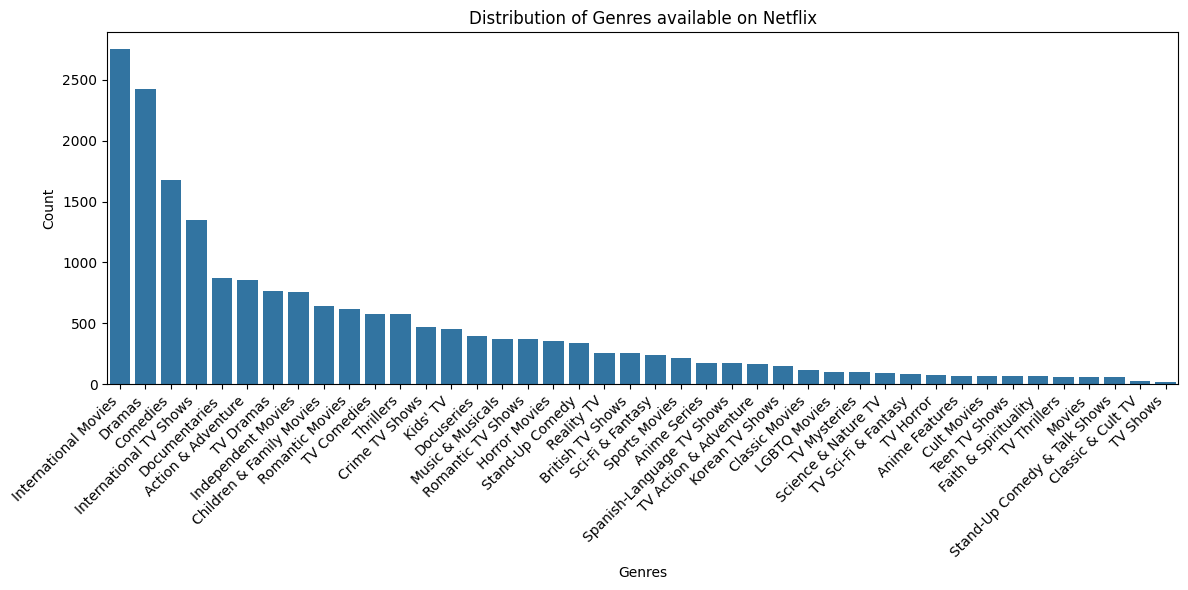

In [132]:
plt.figure(figsize = (12, 6))
sns.barplot(x = genre_counts.index, y = genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres available on Netflix')
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.tight_layout()
plt.show()

<i> Conlusion </i>
Netflix has a very diverse genres of content available. It seems like most of the content genres are international movies, dramas and comedies.

Top Genres plots

Text(0.5, 1.0, 'Top 10 Genres of Movies')

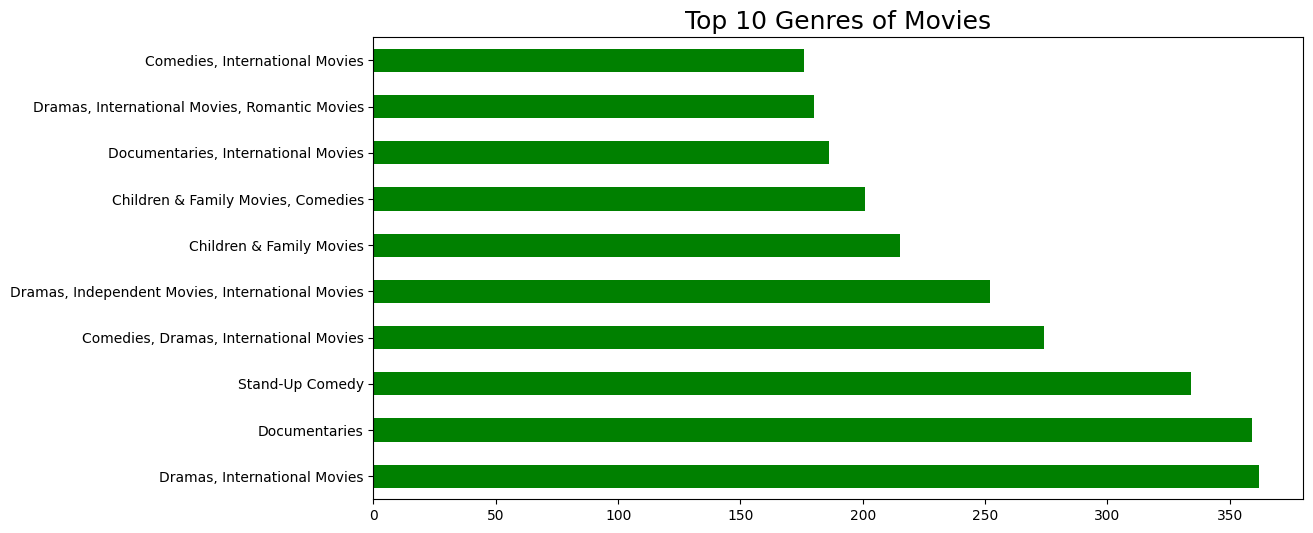

In [133]:
plt.figure(figsize = (12,6))
netflix[netflix["type"] == "Movie"]["listed_in"].value_counts()[:10].plot(kind = "barh",color = "green")
plt.title("Top 10 Genres of Movies", size = 18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

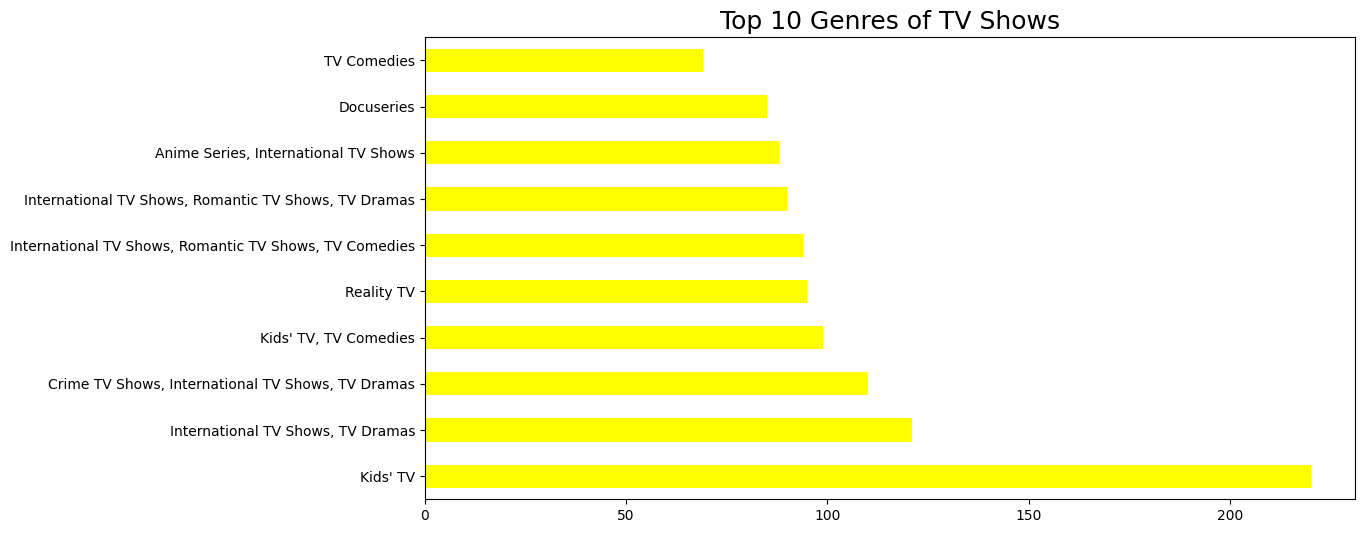

In [134]:
plt.figure(figsize = (12,6))
netflix[netflix["type"] == "TV Show"]["listed_in"].value_counts()[:10].plot(kind = "barh", color = "yellow")
plt.title("Top 10 Genres of TV Shows",size = 18)

4.3) Rating analysis

Rating distribution

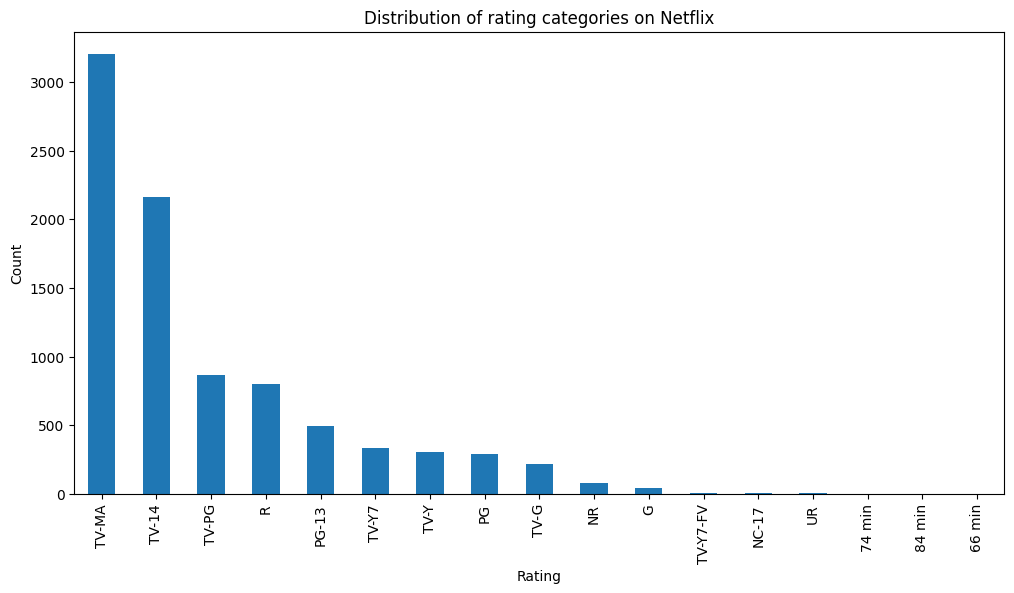

In [135]:
plt.figure(figsize = (12,6))
netflix['rating'].value_counts(normalize = False).plot.bar()
plt.title('Distribution of rating categories on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

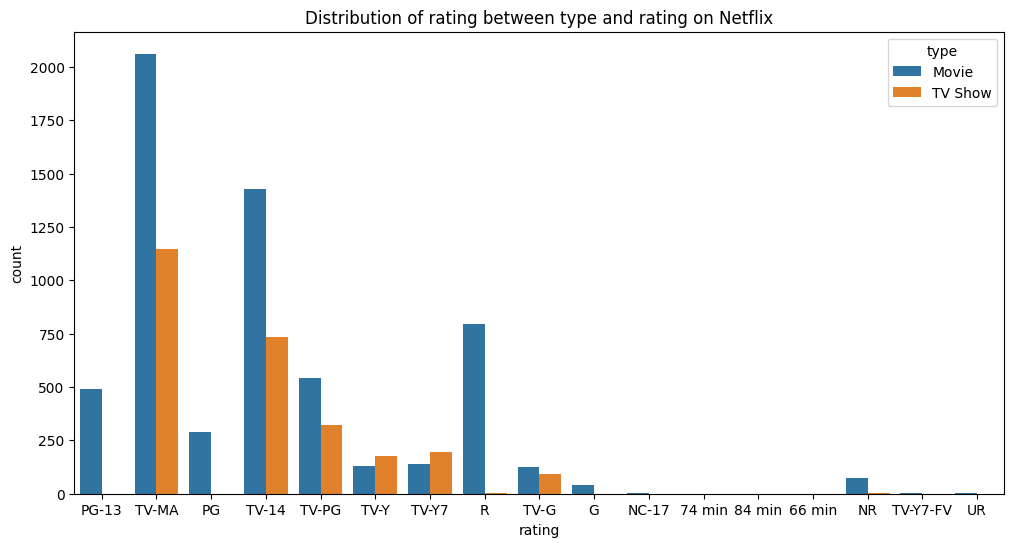

In [136]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'rating', hue = 'type', data = netflix)
plt.title('Distribution of rating between type and rating on Netflix')
plt.show()

<i> Conlusion </i>
Most of the content available on Netflix are for mature audience.

4.4) Content analysis

Available content evolution

In [137]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year

movie_per_year = []
tv_shows_per_year = []

for i in range(2010,2020):
    M=netflix.loc[(netflix['type'] == 'Movie') & (netflix.year_added == i)] 
    TV=netflix.loc[(netflix['type'] == 'TV Show') & (netflix.year_added == i)] 
    movie_per_year.append(len(M))
    tv_shows_per_year.append(len(TV))

Content plot

In [138]:
line1 = go.Scatter(x = [i for i in range(2008,2020)], y = movie_per_year,mode = 'lines+markers', name = 'Movies')
line2 = go.Scatter(x = [i for i in range(2008,2020)], y = tv_shows_per_year, mode = 'lines+markers', name = 'TV Shows')
data = [line1, line2]
layout = go.Layout(title = "Content added over the years", legend=dict(x = 0.1, y = 1.1, orientation = "h"))
fig = go.Figure(data, layout = layout)
fig.show()

<i> Conlusion </i>
Netflix has added a lot of content through the years, especially after 2014. There is more movies than TV Shows.

Frequence of release plots

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

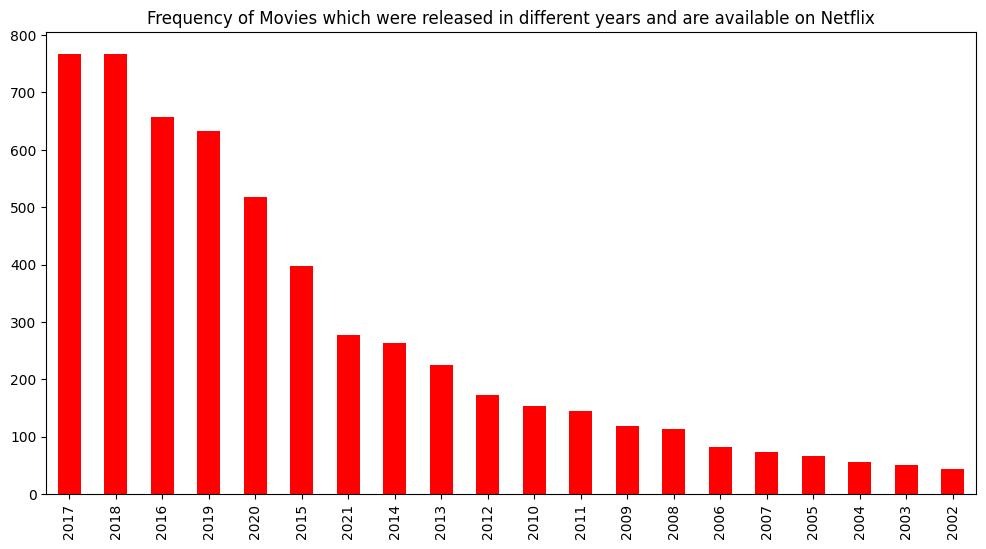

In [139]:
plt.figure(figsize = (12,6))
netflix[netflix["type"] == "Movie"]["release_year"].value_counts()[:20].plot(kind = "bar",color = "Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

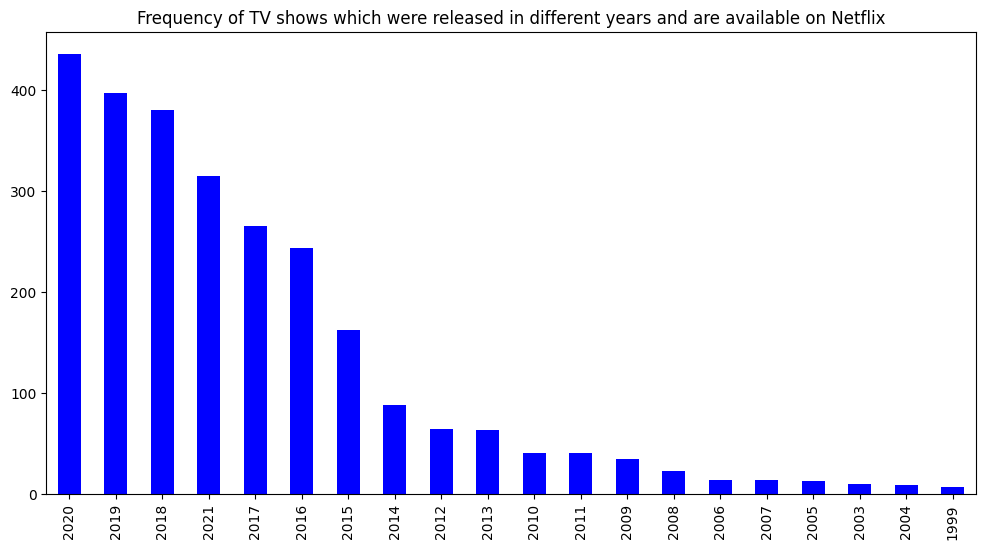

In [140]:
plt.figure(figsize = (12,6))
netflix[netflix["type"] == "TV Show"]["release_year"].value_counts()[:20].plot(kind = "bar", color = "Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Netflix has released the most content over the recent years.